## Efficient Frontier Revisited ##

>Let the market return be the target return. Estimate the expected deviation from market return, for the ten industry portfolios:

In [3]:
import pandas as pd;
import numpy as np;
import statsmodels.api as sm;
import statsmodels.stats.api as sms;
import statsmodels.discrete.discrete_model as smdiscrete
import functools as ft
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load the data from the Excel file
Industry_data = pd.read_excel("Industry_Portfolio.xlsx", index_col= 0)
data = pd.read_excel("Market_Portfolio.xlsx", index_col= 0)
Mkt_returns = data["Market"]

excess_returns = Industry_data.sub(Mkt_returns, axis=0)
industries_std = pd.DataFrame(excess_returns.std())
industries_std = industries_std.rename(columns={industries_std.columns[0]: "Expected deviation from Mkt return"})
industries_std

,Expected deviation from Mkt return
NoDur,2.332528
Durbl,5.160320
Manuf,3.262711
Enrgy,9.863774
HiTec,3.525511
Telcm,7.497619
Shops,4.865390
Hlth,11.262916
Utils,5.731944
Other,9.785573


>Also estimate the covariance matrix of return deviations, for the ten industry portfolios:

In [45]:
# Calculate covariance matrix
cov_matrix = pd.DataFrame(excess_returns.cov())
cov_matrix

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,5.439696,-6.073035,-1.396192,-1.200533,-1.883151,1.538885,1.140741,3.815137,4.272002,-1.768738
Durbl,-6.073035,26.628901,4.908024,-3.481055,1.891577,-1.707625,-0.354335,-8.082946,-9.617490,4.385865
Manuf,-1.396192,4.908024,2.950499,1.666133,0.065267,-0.626416,-1.154597,-2.288900,-1.901412,0.358904
Enrgy,-1.200533,-3.481055,1.666133,19.274911,-1.516972,-1.040525,-3.710439,-2.485796,4.454368,-3.864826
HiTec,-1.883151,1.891577,0.065267,-1.516972,5.098746,-0.773294,-0.245350,-1.936284,-2.342839,-1.404050
Telcm,1.538885,-1.707625,-0.626416,-1.040525,-0.773294,4.682567,0.463797,0.693157,2.721477,-1.271778
Shops,1.140741,-0.354335,-1.154597,-3.710439,-0.245350,0.463797,4.452628,0.764510,-0.176666,-0.256987
Hlth,3.815137,-8.082946,-2.288900,-2.485796,-1.936284,0.693157,0.764510,7.820446,3.496136,-1.726842
Utils,4.272002,-9.617490,-1.901412,4.454368,-2.342839,2.721477,-0.176666,3.496136,12.267476,-4.055112
Other,-1.768738,4.385865,0.358904,-3.864826,-1.404050,-1.271778,-0.256987,-1.726842,-4.055112,4.503204


>Plot the minimum-tracking-error frontier generated by the ten industry portfolios.

>This graph must have expected (monthly) return deviation on the vertical axis vs (monthly) tracking error on the horizontal axis.This graph must cover the range from 0% to 0.1% on the vertical axis, in increments of 0.005% (or less).

In [46]:
excess_returns_mean = excess_returns.mean().values
cov_inverse = np.linalg.inv(cov_matrix)
e = np.array([1,1,1,1,1,1,1,1,1,1])
alpha = ft.reduce(np.matmul, [excess_returns_mean.T , cov_inverse , e])
Zeta = ft.reduce(np.matmul, [excess_returns_mean.T , cov_inverse, excess_returns_mean])
delta = ft.reduce(np.matmul,[e.T ,cov_inverse ,e ])

In [47]:
# Calculation of minimum tracking error frontier(mtef)
frontier_mean_return = np.array(np.arange(0.00, 0.13 , 0.005))
mtef = alpha / delta
frontier_var = np.vectorize(lambda rp: (1 / delta) + (delta / (Zeta * delta - alpha ** 2)) * ((rp - mtef) ** 2))(frontier_mean_return)
frontier_std = frontier_var ** 0.5

# Creation of the frontier plot dataframe
frontier_plot = pd.DataFrame(data = {"stddeviation_mtef" : frontier_std, "expected_mean_mtef" :frontier_mean_return})
frontier_plot



,stddeviation_mtef,expected_mean_mtef
0,0.245740,0.000
1,0.228411,0.005
2,0.211704,0.010
3,0.195778,0.015
4,0.180840,0.020
5,0.167154,0.025
6,0.155053,0.030
7,0.144934,0.035
8,0.137235,0.040
9,0.132381,0.045


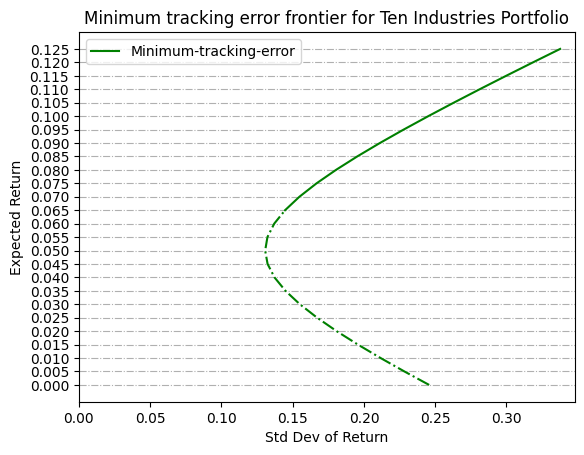

In [48]:
import matplotlib.pyplot as plt
import numpy as np

midpoint = int(len(frontier_plot) / 2)

# Plotting mtef
plt.plot(frontier_plot.iloc[midpoint:]["stddeviation_mtef"], frontier_plot.iloc[midpoint:]["expected_mean_mtef"], "g-", label = "Minimum-tracking-error")
plt.plot(frontier_plot.iloc[0:midpoint+1]["stddeviation_mtef"], frontier_plot.iloc[0:midpoint+1]["expected_mean_mtef"], "g-.")

# Define the desired y-axis ticks
y_ticks = np.arange(0.00, 0.13 , 0.005)  # From 0% to 0.1% in increments of 0.005

# Set the y-axis ticks
plt.yticks(y_ticks)

# Enable major gridlines for the y-axis
plt.title("Minimum tracking error frontier for Ten Industries Portfolio")
plt.xlabel("Std Dev of Return")
plt.ylabel("Expected Return")
plt.xlim(left = 0)
plt.legend()
plt.grid(axis='y', linestyle='-.', which='major')

# Show the plot
plt.show()

>Also plot the line starting from the origin that is tangent to the upper half of the minimum-tracking-error frontier.

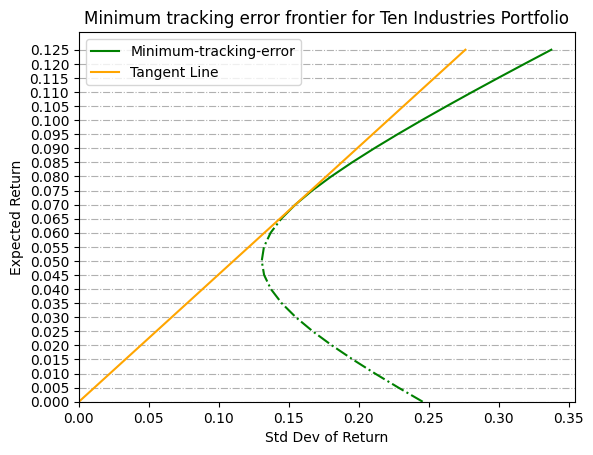

In [49]:
#Plotting mtef curve
plt.plot(frontier_plot.iloc[midpoint:]["stddeviation_mtef"], frontier_plot.iloc[midpoint:]["expected_mean_mtef"], "g-", label = "Minimum-tracking-error")
plt.plot(frontier_plot.iloc[0:midpoint+1]["stddeviation_mtef"], frontier_plot.iloc[0:midpoint+1]["expected_mean_mtef"], "g-.")

# Plot tangent line
rf_riskless = 0
tangent_line_return = np.array(np.arange(0.00, 0.13 , 0.005))
tangent_line_variance = np.vectorize(lambda rp: (rp - rf_riskless) ** 2 / (Zeta - (2 * alpha * rf_riskless) + (delta * (rf_riskless ** 2)))) \
                        (tangent_line_return)
tangent_line_std = tangent_line_variance ** 0.5
tangent_line_plot = pd.DataFrame(data = {"tangent_line_xvalues": tangent_line_std, "tangent_line_yvalues": tangent_line_return})
plt.plot(tangent_line_plot["tangent_line_xvalues"], tangent_line_plot["tangent_line_yvalues"], "orange", label = "Tangent Line")

# Define the desired y-axis ticks
y_ticks = np.arange(0.00, 0.13 , 0.005)  # From 0% to 0.1% in increments of 0.005

# Set the y-axis ticks
plt.yticks(y_ticks)

# Enable major gridlines for the y-axis
plt.title("Minimum tracking error frontier for Ten Industries Portfolio")
plt.xlabel("Std Dev of Return")
plt.ylabel("Expected Return")
plt.xlim(left = 0)
plt.ylim(bottom = 0)
plt.legend()
plt.grid(axis='y', linestyle='-.', which='major')


>Calculate the information ratio and portfolio weights for the "tangency" portfolio

In [50]:
# Calculate tangency portfolio weights
tangency_portfolio_return = (alpha * rf_riskless - Zeta) / (delta * rf_riskless - alpha)
lambda_tangency = (tangency_portfolio_return - rf_riskless) / (Zeta - (2 * alpha * rf_riskless) + (delta * (rf_riskless ** 2)))
tangency_portfolio_weights = lambda_tangency * np.matmul(cov_inverse, (excess_returns_mean - rf_riskless * e))
tangency_portfolio = pd.DataFrame(data={"Portfolio weights for tangency portfolio": tangency_portfolio_weights}, index=excess_returns.columns)
tangency_portfoliov2 = tangency_portfolio.reset_index()
tangency_portfolio

,Portfolio weights for tangency portfolio
NoDur,0.052634
Durbl,0.000153
Manuf,0.137627
Enrgy,0.087032
HiTec,0.179353
Telcm,0.071074
Shops,0.106884
Hlth,0.102776
Utils,0.040162
Other,0.222304


In [58]:
# information ratio = (expected mean of industry - mkt) / std of industry - mkt
information_ratio_mean = (np.matmul(tangency_portfolio_weights, excess_returns_mean.T))
information_ratio_std = (ft.reduce (np.matmul, [tangency_portfolio_weights, cov_matrix, tangency_portfolio_weights.T])) ** 0.5
information_ratio = information_ratio_mean / information_ratio_std
print(f"Information Ratio for the tangency portfolio is {information_ratio:.4f}.")

Information Ratio for the tangency portfolio is 0.4525.


## Part 2: Minimum-Variance Frontier w/o Short Sales ##

> Use the monthly returns of the ten industry portfolios to generate the minimum-variance frontier without short sales, using Monte Carlo simulation. Portfolio weights will be limited to the range [0, 1].

>Randomly draw each element of w, the 10 × 1 vector of portfolio weights, from the (standard) uniform distribution in the range [0, 1]. Divide w by the sum of the portfolio weights, to ensure that the portfolio weights sum to one. Use the normalised w to calculate the mean return and standard deviation of return for the simulated portfolio. Repeat this process until you have (at least) 100,000 data points.
Plot the data points with mean return on the vertical axis vs standard deviation of return on the horizontal axis.


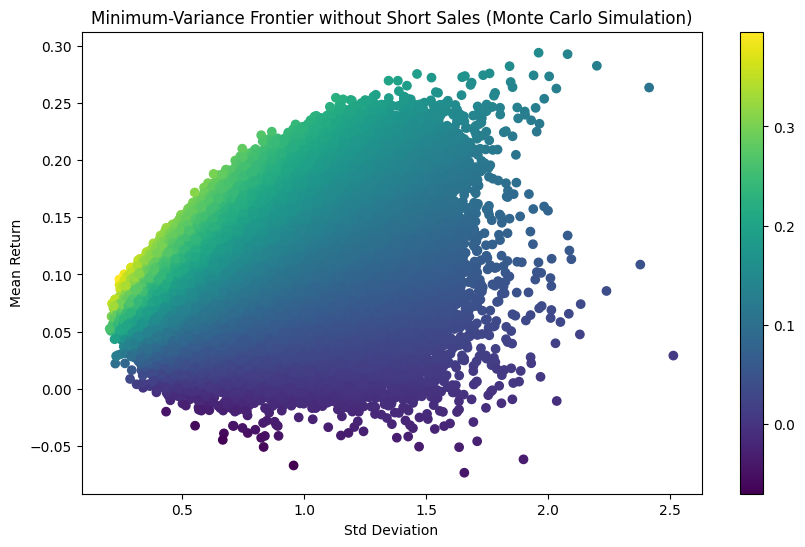

In [64]:
from matplotlib.colors import LinearSegmentedColormap
# Create a custom colormap with specific colors
colors = ['blue', 'green', 'yellow', 'red', 'magenta', 'cyan']  # Define your desired colors
custom_cmap = LinearSegmentedColormap.from_list('custom_colormap', colors, N=1000000)  # N is the number of levels

# Define the number of simulations
num_simulations = 1000000
# Number of assets in the portfolio
num_assets = 10

# Define the expected returns and covariances of the industry portfolios
excess_returns_mean = excess_returns.mean().values
cov_matrix = excess_returns.cov().values

# Initialize arrays to store portfolio risk and return values
portfolio_returns = np.zeros(num_simulations)
portfolio_volatility = np.zeros(num_simulations)

# Randomly generate portfolio weights for each simulation
for i in range(num_simulations):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)  # Normalize weights to sum up to 1
    
    # Calculate portfolio return and volatility
    portfolio_returns[i] = np.sum(weights * excess_returns_mean)
    portfolio_volatility[i] = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Create a scatter plot of the simulated portfolios
plt.figure(figsize=(10, 6))
scatter1 = plt.scatter(portfolio_volatility, portfolio_returns, c=portfolio_returns / portfolio_volatility, marker='o')
cbar = plt.colorbar(scatter1, cmap=custom_cmap)
plt.xlabel('Std Deviation')
plt.ylabel('Expected Return')
plt.title('Minimum-Variance Frontier without Short Sales (Monte Carlo Simulation)')
#plt.grid(True)
plt.show()


>Repeat this entire process by simulating 1/w using the standard uniform distribution ⇒ take the reciprocal of the random draw from the standard uniform distribution as the portfolio weight.
•	Plot the new data points (on a separate graph) with mean return on the vertical axis vs standard deviation of return on the horizontal axis.


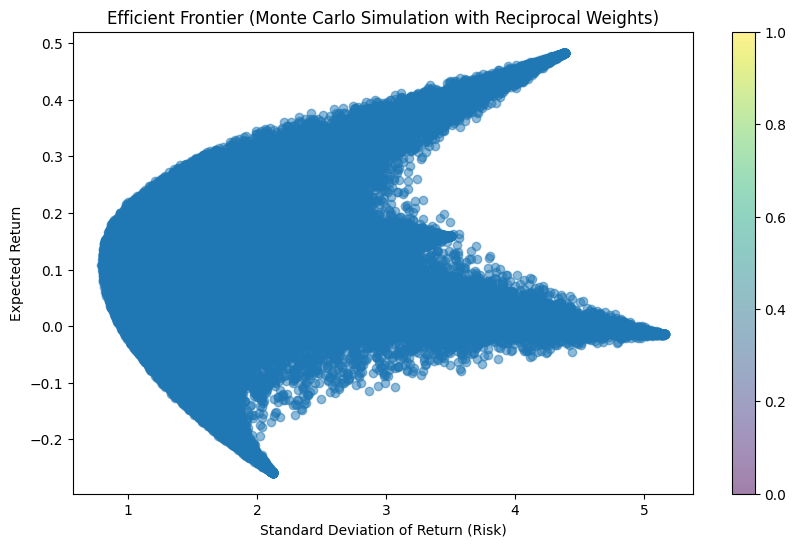

In [69]:
from matplotlib.colors import LinearSegmentedColormap
# Create a custom colormap with specific colors
colors = ['blue', 'green', 'yellow', 'red', 'magenta', 'cyan']  # Define your desired colors
custom_cmap = LinearSegmentedColormap.from_list('custom_colormap', colors, N=10)  # N is the number of levels

# Define the number of simulations
num_simulations = 1000000

# Number of assets in the portfolio
num_assets = 10

# Initialize arrays to store portfolio returns and risk values
monte_simulation2_mean = np.zeros(num_simulations)
monte_simulation2_std = np.zeros(num_simulations)

for i in range(num_simulations):
    # Randomly generate the reciprocal of portfolio weights from the standard uniform distribution
    reciprocal_weights = 1.0 / np.random.random(num_assets)
    reciprocal_weights /= np.sum(reciprocal_weights)  # Normalize weights to sum up to 1
    
    # Define expected returns and standard deviations for each asset (use your actual data)
    excess_returns_mean = excess_returns.mean().values
    excess_returns_std = excess_returns.std().values
    
    
    # Calculate portfolio return and volatility
    monte_simulation2_mean[i] = np.sum(reciprocal_weights * excess_returns_mean)
    
    # Calculate portfolio risk (standard deviation) using the correct formula
    monte_simulation2_std[i] = np.sqrt(np.dot(reciprocal_weights, np.dot(np.diag(excess_returns_std **2), reciprocal_weights)))

# Plot the new data points
plt.figure(figsize=(10, 6))
scatter2 = plt.scatter(monte_simulation2_std, monte_simulation2_mean, alpha=0.5)
cbar = plt.colorbar(scatter2, cmap=custom_cmap)
plt.xlabel('Standard Deviation of Return (Risk)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier (Monte Carlo Simulation with Reciprocal Weights)')
plt.show()
